In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
df = pd.read_csv('AirQualityUCI.csv',parse_dates={'datetime': ['Date', 'Time']})
#sns.pairplot(df)
df.head()
df.drop('NMHC_GT', axis=1, inplace=True)
df.replace(to_replace= -200, value= np.NaN, inplace= True)
col_list = df.columns[2:13]

for i in col_list:
    df[i] = df[i].fillna(df[i].mean())
df.mean().plot.pie(ylabel='',radius = 2,autopct = "%.2f%%");

/tmp/ipykernel_10598/1657067825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


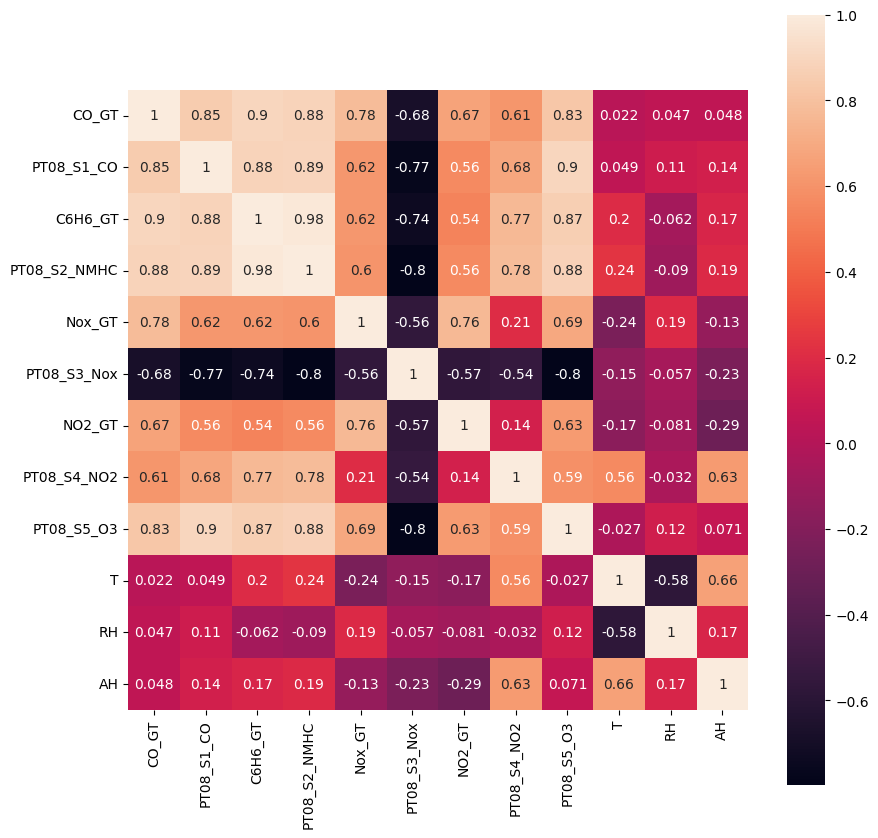

In [5]:
correlation = df.corr()
fig_corr= plt.gcf(); #get current figure
fig_corr.set_size_inches(10,10);
sns.heatmap(correlation,annot = True, square = True)

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
